In [29]:
import numpy as np
import os
import pickle
import matplotlib.cm as cm
import pandas as pd 
import matplotlib.pyplot as plt
save_dir = '/nese/mit/group/evlab/projects/Greta_Eghbal_manifolds/extracted/'
def moving_average(x,w):
    w_min=1#int(np.floor(w/2))
    return pd.Series(x).rolling(w, min_periods=w_min).mean()
av_window=10
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [30]:
model_identifier= 'NN-tree_nclass=64_nobj=64000_nhier=6_beta=0.000161_sigma=5.0_nfeat=936-train_test-fixed_data_figure_2.pkl'
d_fig_2=pickle.load(open(os.path.join(save_dir,model_identifier),'rb'))
x_bar=d_fig_2['x_bar']
array_correspondance=d_fig_2['array_correspondance']
accuracies=d_fig_2['accuracies']
epoch_bar=d_fig_2['epoch_bar']
epoch_batch=d_fig_2['epoch_batch']
layer_dist_over_time=d_fig_2['layer_dist_over_time']
array_correspondance=d_fig_2['array_correspondance']

# plot figure 2 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:87: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


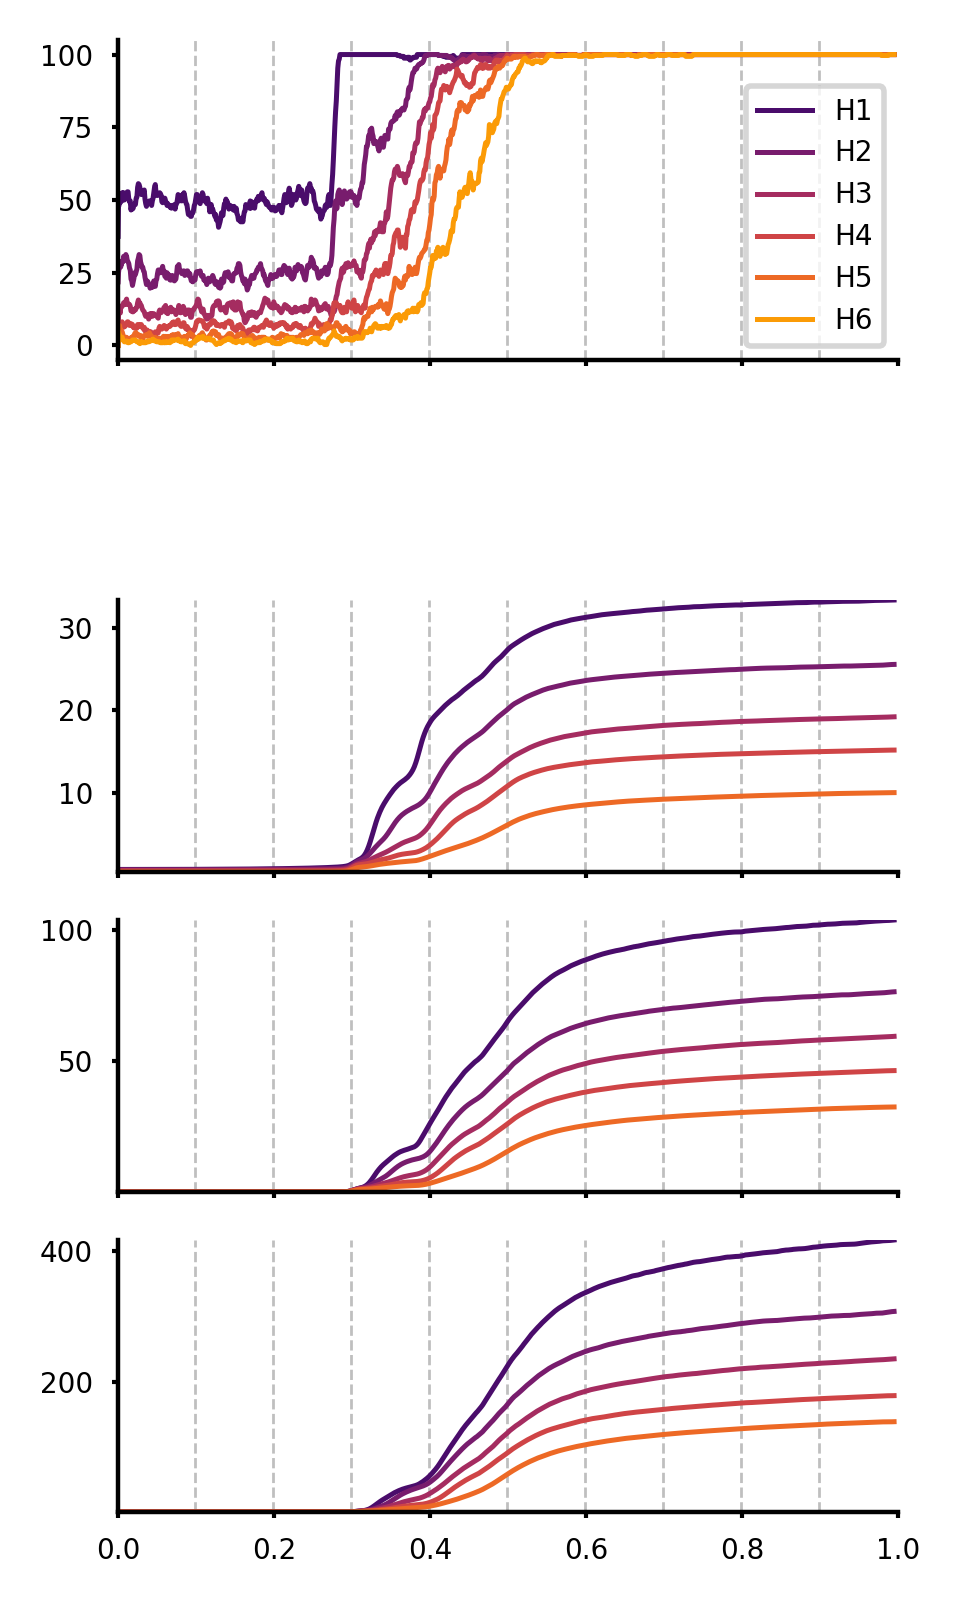

In [31]:
import matplotlib
matplotlib.rcParams['font.size'] = 5
av_window=10
xmin=0
xmax=1
num_colors=accuracies.shape[1]+2
color_fact=num_colors+2
h0=cm.get_cmap('inferno',color_fact)
line_cols=np.flipud(h0(np.arange(color_fact)/color_fact))
line_cols=line_cols[2:,:]
#################
## accuracy ## 
fig=plt.figure(1,figsize=(2.6,4.0),dpi=400,frameon=False)
## hier accuracy ## 
ax=plt.axes((.15,.77,.75,.2))
for h in range(accuracies.shape[1]):
        ax.plot(moving_average(x_bar,av_window),moving_average(accuracies[:,5-h],av_window),linewidth=.9,label=f'H{h+1}',color=line_cols[5-h,:])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5,alpha=.5)
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_xlim((xmin,xmax))
ax.axes.xaxis.set_ticklabels([])
ax.tick_params(direction='out', length=1, width=.75, colors='k',grid_color='k', grid_alpha=0.5)
ax.set_ylim((-5.0, 105.0))
#####################################
## distance layer 1 ## 
ax=plt.axes((.15,.45,.75,.17))
k=1 # layer 1
layer_data=layer_dist_over_time[k]
for h, hier_data in enumerate(layer_data):
    distance_data=hier_data['data'].mean(axis=1)
    corrected_data=list(np.empty(epoch_batch.shape)*np.NaN)
    for idx, x in enumerate(array_correspondance):
        corrected_data[int(x)]=distance_data[idx]
    ax.plot(moving_average(x_bar,av_window),moving_average(corrected_data,av_window),label=f"n_class:{hier_data['data'].shape[1]}",linewidth=.9,color=line_cols[len(layer_data)-h,:])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.axes.xaxis.set_ticklabels([])
ax.set_yscale('linear')
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_xlim((xmin,xmax))
ax.tick_params(direction='out', length=1, width=.75, colors='k',grid_color='k', grid_alpha=0.5)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5,alpha=.5)
###############################
ax=plt.axes((.15,.25,.75,.17))
k=2 # layer 1
layer_data=layer_dist_over_time[k]
for h, hier_data in enumerate(layer_data):
    distance_data=hier_data['data'].mean(axis=1)
    corrected_data=list(np.empty(epoch_batch.shape)*np.NaN)
    for idx, x in enumerate(array_correspondance):
        corrected_data[int(x)]=distance_data[idx]
    ax.plot(moving_average(x_bar,av_window),moving_average(corrected_data,av_window),label=f"n_class:{hier_data['data'].shape[1]}",linewidth=.9,color=line_cols[len(layer_data)-h,:])
ax.set_yscale('linear')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.axes.xaxis.set_ticklabels([])
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_xlim((xmin,xmax))
ax.tick_params(direction='out', length=1, width=.75, colors='k',grid_color='k', grid_alpha=0.5)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5,alpha=.5)
###################################
ax=plt.axes((.15,.05,.75,.17))
k=3 # layer 1
layer_data=layer_dist_over_time[k]
for h, hier_data in enumerate(layer_data):
    distance_data=hier_data['data'].mean(axis=1)
    corrected_data=list(np.empty(epoch_batch.shape)*np.NaN)
    for idx, x in enumerate(array_correspondance):
        corrected_data[int(x)]=distance_data[idx]
    ax.plot(moving_average(x_bar,av_window),moving_average(corrected_data,av_window),label=f"n_class:{hier_data['data'].shape[1]}",linewidth=.9,color=line_cols[len(layer_data)-h,:])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yscale('linear')
ax.autoscale(enable=True, axis='x', tight=True)
ax.autoscale(enable=True, axis='y', tight=True)
ax.set_xlim((xmin,xmax))
ax.tick_params(direction='out', length=1, width=.75, colors='k',
               grid_color='k', grid_alpha=0.5)
ax.vlines(epoch_bar,ax.get_ylim()[0],ax.get_ylim()[1],color=(.5,.5,.5),linestyle='dashed',linewidth=.5,alpha=.5)
#####################################
plt.tight_layout()
plt.show()
#fig.savefig(f"{results_dir}/euclidean_{model_identifier}_{train_identifier}_v4.pdf",transparent=True)  

